# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [4]:
import pandas as pd
adver_data = pd.read_csv('C:/11/advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [60]:
adver_data.loc[:,['TV', 'Radio', 'Newspaper']]
adver_data['bias']=1
adver_data

,TV,Radio,Newspaper,Sales,bias
1,230.1,37.8,69.2,22.1,1
2,44.5,39.3,45.1,10.4,1
3,17.2,45.9,69.3,9.3,1
4,151.5,41.3,58.5,18.5,1
5,180.8,10.8,58.4,12.9,1
6,8.7,48.9,75.0,7.2,1
7,57.5,32.8,23.5,11.8,1
8,120.2,19.6,11.6,13.2,1
9,8.6,2.1,1.0,4.8,1
10,199.8,2.6,21.2,10.6,1


In [68]:
for c in ['TV', 'Radio', 'Newspaper']: #итерируемся по всем признакам, включая Sales
    mean, std = adver_data[c].mean(), adver_data[c].std() #mean и std
    adver_data[c]=(adver_data[c] - mean)/std #нормируем данные
adver_data.head()

,TV,Radio,Newspaper,Sales,bias
1,0.967425,0.979066,1.774493,22.1,1
2,-1.194379,1.080097,0.667903,10.4,1
3,-1.512360,1.524637,1.779084,9.3,1
4,0.051919,1.214806,1.283185,18.5,1
5,0.393196,-0.839507,1.278593,12.9,1


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [69]:
X = adver_data.values
y = adver_data.values

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [23]:
#means, stds = # Ваш код здесь
import numpy as np
X['TV'] = (X['TV'] - np.mean(X['TV']))/np.std(X['TV'])
X['Radio'] = (X['Radio'] - np.mean(X['Radio']))/np.std(X['Radio'])
X['Newspaper'] = (X['Newspaper'] - np.mean(X['Newspaper']))/np.std(X['Newspaper'])


In [28]:
X

array([[  9.69852266e-01,   9.81522472e-01,   1.77894547e+00,
          1.00000000e+00],
       [ -1.19737623e+00,   1.08280781e+00,   6.69578760e-01,
          1.00000000e+00],
       [ -1.51615499e+00,   1.52846331e+00,   1.78354865e+00,
          1.00000000e+00],
       [  5.20496822e-02,   1.21785493e+00,   1.28640506e+00,
          1.00000000e+00],
       [  3.94182198e-01,  -8.41613655e-01,   1.28180188e+00,
          1.00000000e+00],
       [ -1.61540845e+00,   1.73103399e+00,   2.04592999e+00,
          1.00000000e+00],
       [ -1.04557682e+00,   6.43904671e-01,  -3.24708413e-01,
          1.00000000e+00],
       [ -3.13436589e-01,  -2.47406325e-01,  -8.72486994e-01,
          1.00000000e+00],
       [ -1.61657614e+00,  -1.42906863e+00,  -1.36042422e+00,
          1.00000000e+00],
       [  6.16042873e-01,  -1.39530685e+00,  -4.30581584e-01,
          1.00000000e+00],
       [ -9.45155670e-01,  -1.17923146e+00,  -2.92486143e-01,
          1.00000000e+00],
       [  7.90028350e

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [29]:
#import numpy as np
#X = np.hstack # Ваш код здесь
X = np.hstack([X, np.ones([X.shape[0], 1], dtype=np.int32)])
X[0:5]

array([[ 0.96985227,  0.98152247,  1.77894547,  1.        ],
       [-1.19737623,  1.08280781,  0.66957876,  1.        ],
       [-1.51615499,  1.52846331,  1.78354865,  1.        ],
       [ 0.05204968,  1.21785493,  1.28640506,  1.        ],
       [ 0.3941822 , -0.84161366,  1.28180188,  1.        ]])

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [57]:
def mserror(y, y_pred):
    return((y-y_pred)**2 # считаем квадраты отклонения 
          ).sum()/len(y_pred)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [ ]:
answer1 = # Ваш код здесь
print(answer1)
write_answer_to_file(answer1, '1.txt')

**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [66]:
def normal_equation(X, y):
    return np.dot(np.linalg.inv(X),y)  # Ваш код здесь

In [65]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

LinAlgError: Last 2 dimensions of the array must be square

**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [ ]:
answer2 = # Ваш код здесь
print(answer2)
write_answer_to_file(answer2, '2.txt')

**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [58]:
def linear_prediction(X, w):
    return np.dot(X,w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [75]:
def normal_equation(X, y):
    a = np.dot(X.T, X) # преобразуем левую часть
    b = np.dot(X.T, y) # преобразуем правую часть
    res = np.linalg.solve(a, b) # решаем систему
    return res

FeatureMatrix = adver_data[['TV', 'Radio', 'Newspaper', 'bias']].values
TargetMatrix  = adver_data.Sales.values

norm_eq_weights= normal_equation(FeatureMatrix, TargetMatrix)
print(norm_eq_weights)

y_pred = np.dot(adver_data[['TV', 'Radio', 'Newspaper', 'bias']].values, norm_eq_weights)
answer3 = mserror(adver_data.Sales.values, y_pred)
print(answer3)
write_answer_to_file(answer3, 'C/11/3.txt')

#ZZ = np.linalg.pinv(X)
#yy = np.hstack(y)
#ZZ*yy
#yy=y.as_matrix
#w = np.dot(ZZ,yy)
#answer3 = # Ваш код здесь
#print(answer3)
#write_answer_to_file(answer3, '3.txt')

[  3.92908869   2.79906919  -0.02259517  14.0225    ]
2.78412631451


FileNotFoundError: [Errno 2] No such file or directory: 'C/11/3.txt'

**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [76]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    N = X.shape[0]                   # всего обьектов (нормировка)
    x = X[train_ind]                 # текуший случайный k обьект 
    y_pred = linear_prediction(x, w) # предсказание для к случайного обьекта 
    rs = (y_pred - y[train_ind])     # регрессионый остаток для k обьекта 
    
    grad0 = 2.0/N*x[0]*rs
    grad1 = 2.0/N*x[1]*rs
    grad2 = 2.0/N*x[2]*rs
    grad3 = 2.0/N*x[3]*rs
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [82]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        new_w = stochastic_gradient_step(X, y, w, random_ind, eta)
        
        # Считаем ошибку
        error = mserror(y, linear_prediction(X, new_w))
        errors.append(error)
        
        weight_dist = np.linalg.norm(w-new_w)
        w = new_w
        iter_num += 1
    print(weight_dist)
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [90]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(FeatureMatrix, TargetMatrix, [0,0,0,0], eta=0.01, max_iter=1e5)


8.0261895799e-09
Wall time: 2.66 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

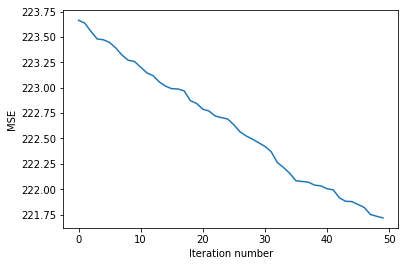

In [89]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

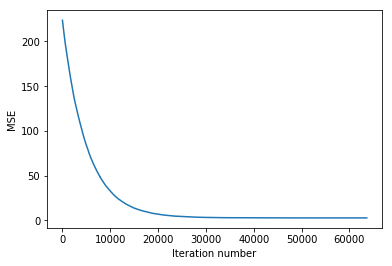

In [91]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [92]:
stoch_grad_desc_weights

array([  3.89172998e+00,   2.79230916e+00,   6.17758541e-03,
         1.39903864e+01])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [93]:
stoch_errors_by_iter[-1]

2.7871848006472946

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [94]:
answer4 = mserror(TargetMatrix, linear_prediction(FeatureMatrix, stoch_grad_desc_weights))
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.78718480065


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**